In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/PJ2/이것저것해봐라/train (1).csv')
train

,회사명,거래소코드,회계년도,상장일,상장폐지일,소속코드,유동비율,당좌비율,현금비율,순운전자본비율,...,부가가치,총자본투자효율,설비투자효율,기계투자효율,부가가치율,노동소득분배율,자본분배율,이윤분배율,폐지사유,부실여부
0,(주)DB하이텍,990,2011-12-01,1975-12-12,NaN,1,35.20,25.50,5.04,-42.95,...,217837.57,18.17,29.75,78.90,39.45,62.53,37.47,-44.96,NaN,0
1,(주)DB하이텍,990,2012-12-01,1975-12-12,NaN,1,55.66,41.39,7.19,-21.27,...,245655.23,21.22,37.03,112.22,41.58,55.93,44.07,-12.76,NaN,0
2,(주)DB하이텍,990,2013-12-01,1975-12-12,NaN,1,46.76,31.58,7.39,-23.99,...,191554.48,18.10,31.86,112.45,38.80,67.15,32.85,-43.35,NaN,0
3,(주)DB하이텍,990,2014-12-01,1975-12-12,NaN,1,65.77,47.39,10.72,-13.08,...,187341.51,19.02,33.99,136.97,33.00,68.59,31.41,-41.11,NaN,0
4,(주)DB하이텍,990,2015-12-01,1975-12-12,NaN,1,138.40,104.20,44.31,9.52,...,386127.30,39.21,78.88,230.24,57.93,35.93,64.07,32.82,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21320,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,5,329.17,290.09,105.67,11.59,...,7373.52,9.80,19.56,3064.10,4.44,47.47,52.53,32.14,NaN,0
21321,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,5,485.39,422.76,49.75,21.47,...,15072.74,18.02,42.99,3489.21,10.00,22.19,77.81,55.02,NaN,0
21322,흥구석유(주),24060,2020-12-01,1994-12-07,NaN,5,1108.08,1013.02,56.54,30.09,...,10271.87,12.27,34.04,3280.80,8.94,30.41,69.59,46.65,NaN,0
21323,흥구석유(주),24060,2021-12-01,1994-12-07,NaN,5,913.64,818.58,31.93,28.57,...,5796.91,7.01,19.15,1308.44,4.38,53.22,46.78,24.13,NaN,0


In [ ]:
# 필요df 리스트로 저장
selected_columns = ['순운전자본비율','부채비율','재고자산증가율', '자기자본순이익률', '총자본증가율','매입채무회전기간','매출액순이익률','금융비용 대 총비용비율','총자본사업이익률','총자본투자효율', '부실여부']
# 최종피쳐 데이터프레임
df = train[selected_columns]


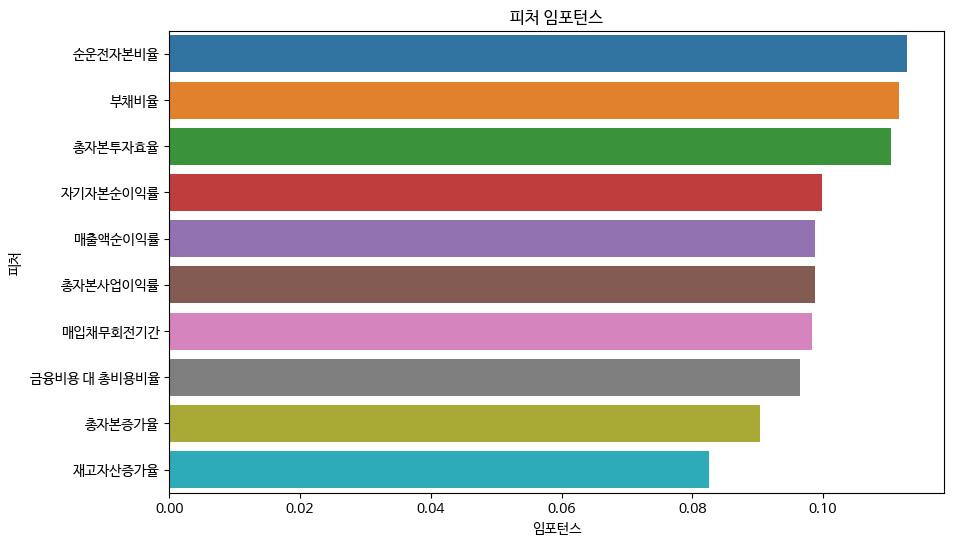

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already defined the 'df' DataFrame

# 피처와 타겟 분리
X = df.drop('부실여부', axis=1)
y = df['부실여부']

# 랜덤 포레스트 분류기 객체 생성
model = RandomForestClassifier()

# 모델 학습
model.fit(X, y)

# 피처 임포턴스 얻기
feature_importances = model.feature_importances_

# 정렬된 인덱스를 얻어내고 내림차순으로 정렬
sorted_indices = feature_importances.argsort()[::-1]

# 피처 이름을 정렬된 인덱스 순서에 맞게 재배열
sorted_features = X.columns[sorted_indices]

# 피처 임포턴스를 막대 그래프로 시각화
plt.figure(figsize=(10, 6))

# Use Seaborn's barplot function with reverse order of importance values
sns.barplot(x=feature_importances[sorted_indices], y=sorted_features)

plt.xlabel('임포턴스')
plt.ylabel('피처')
plt.title('피처 임포턴스')
plt.show()
